In [1]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib.path import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import savgol_filter
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib.colors import ListedColormap

mpl.rcParams['pdf.fonttype']=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 11

fig_path = 'C:/Users/LAB-JJ/Desktop/code/figs/'

%matplotlib inline

c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
df = pd.read_csv('.../second_order_data.csv')

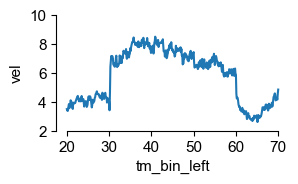

In [4]:
plt.rcParams['font.size'] = 11
fig = plt.figure(figsize=(3, 1.5))

ax = sns.lineplot(data=df[(df.ts.between(20,70))&(df.genotype=='SS51024')&(df.vel<=30)], x='tm_bin_left', y='vel', lw=1.5,errorbar=None)
#plt.ylim(4,10)
plt.ylim(2,10)
plt.yticks([2,4,6,8,10])
plt.xticks([20,30,40, 50, 60,70])
sns.despine(trim=True)
plt.show()

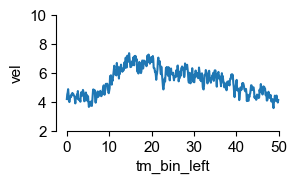

In [5]:
plt.rcParams['font.size'] = 11
fig = plt.figure(figsize=(3, 1.5))

ax = sns.lineplot(data=df[(df.ts.between(0,50))&(df.genotype=='SS35283')&(df.vel<=30)], x='tm_bin_left', y='vel', lw=1.5,errorbar=None)
plt.ylim(2,10)
plt.xticks(np.arange(0, 51, 10))
plt.yticks(np.arange(2, 11, 2))
sns.despine(trim=True)
plt.show()

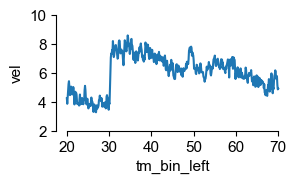

In [6]:
plt.rcParams['font.size'] = 11
fig = plt.figure(figsize=(3, 1.5))

ax = sns.lineplot(data=df[(df.ts.between(20,70))&(df.genotype=='SS01159')&(df.vel<=30)], x='tm_bin_left', y='vel', lw=1.5,errorbar=None)
plt.ylim(2,10)
plt.xticks(np.arange(20, 71, 10))
plt.yticks(np.arange(2, 11, 2))
sns.despine(trim=True)
plt.show()

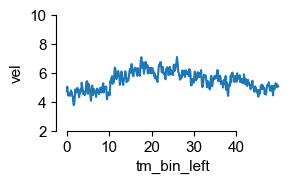

In [8]:
plt.rcParams['font.size'] = 11
fig = plt.figure(figsize=(3, 1.5))

ax = sns.lineplot(data=df[(df.ts.between(0,50))&(df.genotype=='40B01AD-splithalf')&(df.vel<=30)], x='tm_bin_left', y='vel', lw=1.5,errorbar=None)
plt.ylim(2,10)
plt.xticks(np.arange(0, 50, 10))
plt.yticks(np.arange(2, 11, 2))
sns.despine(trim=True)
plt.show()

In [ ]:
# Calculate mean velocity for each genotype in the 10s pre and 10s post opto activation, grouped by tm_bin_left
# Define time windows for each genotype
time_windows = {
    'SS35283': {'pre': (0, 10), 'post': (10, 20)},
    '40B01AD-splithalf': {'pre': (0, 10), 'post': (10, 20)},
    'SS01159': {'pre': (20, 30), 'post': (30, 40)},
    'SS51024': {'pre': (20, 30), 'post': (30, 40)},
    'SS46373': {'pre': (0, 10), 'post': (10, 20)}
}

results = []
full_df = []

for genotype, windows in time_windows.items():
    for period, (start, end) in windows.items():
        subset = df[(df['genotype'] == genotype) &
                    (df['tm_bin_left'] >= start) &
                    (df['tm_bin_left'] < end)]
        full_df.append(subset)
        # Group by fly and tm_bin_left to get mean velocity per fly per bin
        mean_vel = subset.groupby(['fly', 'tm_bin_left'])['vel'].mean().reset_index()
        mean_vel['genotype'] = genotype
        mean_vel['period'] = period
        results.append(mean_vel)

vel_compare_df = pd.concat(results, ignore_index=True)
final_df = pd.concat(full_df, ignore_index=True)


from scipy.stats import ttest_ind
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare data for t-test and plotting
# Only keep genotypes with both pre and post data
genotypes = vel_compare_df['genotype'].unique()
ttest_results = []

plot_df = vel_compare_df[vel_compare_df['period'].isin(['pre', 'post'])].copy()
plot_df = plot_df[plot_df['vel']>0]
# Plot
fig = plt.figure(figsize=(3, 1.75))
sns.boxplot(data=plot_df, x='genotype', y='vel', hue='period', 
            showfliers=False,
            width=.75,  
            legend=False, 
            order=['40B01AD-splithalf','SS51024','SS35283','SS01159'])
plt.ylim(-0.1,20)
plt.yticks(np.arange(0, 21, 10))

sns.despine()
plt.legend(title='Period')
plt.tight_layout()
plt.show()



In [ ]:
from scipy.stats import ttest_ind

agg_df = vel_compare_df.groupby(['fly', 'period', 'genotype'], as_index=False)['vel'].mean()
# Filter for post period
post_df = agg_df[agg_df['period'] == 'post']

# Get the post velocities for 40B01AD-splithalf
ref_genotype = '40B01AD-splithalf'
ref_post = post_df[post_df['genotype'] == ref_genotype]['vel']

# Compare each genotype's post period to 40B01AD-splithalf
comparison_results = []
for genotype in post_df['genotype'].unique():
    if genotype == ref_genotype:
        continue
    group_post = post_df[post_df['genotype'] == genotype]['vel']
    stat, pval = ttest_ind(ref_post, group_post, nan_policy='omit')
    comparison_results.append({'genotype': genotype, 't_stat': stat, 'p_value': pval})

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

In [ ]:
df2 = pd.read_csv('.../jumping_data.csv')

C:\Users\LAB-JJ\AppData\Local\Temp\ipykernel_10488\2475202170.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(p + 'jumping_data.csv')


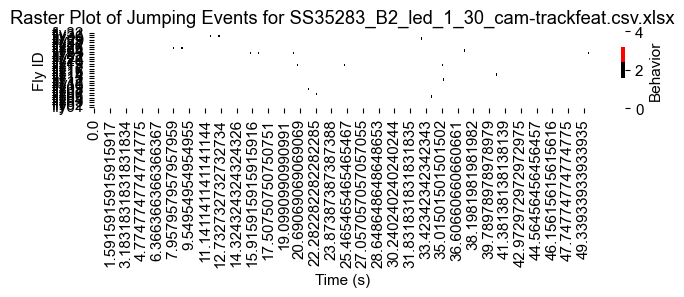

In [11]:
behavior_map = {'walking': 1, 'standing': 0, 'jumping': 2, 'unknown': 3}

fp = 'SS35283_B2_led_1_30_cam-trackfeat.csv.xlsx'
#plt.figure(figsize=(10, 2 * len(paths)))
# for i, fp in enumerate(paths):
file_df_ctrl = df[df['file_path'] == fp]

pivot_df_ctrl = file_df_ctrl[file_df_ctrl.ts.between(0, 50)].pivot_table(
    index='fly',
    columns='ts',
    values='behavior_num',
    aggfunc='max'  # now jump > walk > stand
)

pivot_df_ctrl = pivot_df_ctrl.drop_duplicates().copy().fillna(4)  # Fill NaNs with 4 (no data)

# # Define a color map for each behavior in behavior_map
behavior_color_dict = {
    0: 'white',   # 
    1: 'white',     # standing
    2: 'black',      # walking
    3: 'red',     # jumping
    4: 'white'     # unknown
}
custom_cmap = ListedColormap([behavior_color_dict[k] for k in sorted(behavior_color_dict.keys())])

#custom_cmap = ListedColormap(['white','white','blue' ,'black'])
fig = plt.figure(figsize=(8,1))  


sns.heatmap(pivot_df_ctrl, vmax=4, cmap=custom_cmap,cbar_kws={'label': 'Behavior'})
plt.yticks(np.arange(1, len(pivot_df_ctrl.index) + 1), pivot_df_ctrl.index)
plt.xlabel('Time (s)')
plt.ylabel('Fly ID')
plt.title(f'Raster Plot of Jumping Events for {fp}')
plt.ylim(0.5, len(pivot_df_ctrl.index) + 0.5)
plt.show()

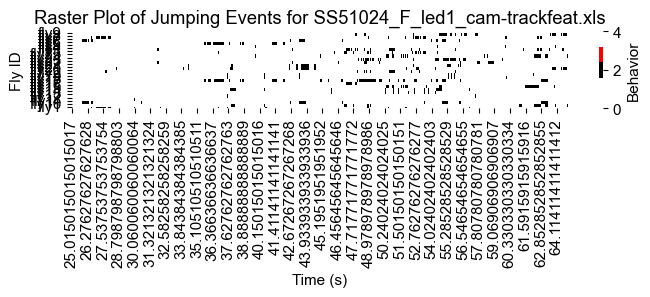

In [12]:
behavior_map = {'walking': 1, 'standing': 0, 'jumping': 2, 'unknown': 3}

fp = 'SS51024_F_led1_cam-trackfeat.xls'
#plt.figure(figsize=(10, 2 * len(paths)))
# for i, fp in enumerate(paths):
file_df_ctrl = df2[df2['file_path'] == fp]

pivot_df_ctrl = file_df_ctrl[file_df_ctrl.ts.between(25, 65)].pivot_table(
    index='fly',
    columns='ts',
    values='behavior_num',
    aggfunc='max'  # now jump > walk > stand
)

pivot_df_ctrl = pivot_df_ctrl.drop_duplicates().copy().fillna(4)  # Fill NaNs with 4 (no data)

# # Define a color map for each behavior in behavior_map
behavior_color_dict = {
    0: 'white',   # 
    1: 'white',     # standing
    2: 'black',      # walking
    3: 'red',     # jumping
    4: 'white'     # unknown
}
custom_cmap = ListedColormap([behavior_color_dict[k] for k in sorted(behavior_color_dict.keys())])

#custom_cmap = ListedColormap(['white','white','blue' ,'black'])
fig = plt.figure(figsize=(8,1))  


sns.heatmap(pivot_df_ctrl, vmax=4, cmap=custom_cmap,cbar_kws={'label': 'Behavior'})
plt.yticks(np.arange(1, len(pivot_df_ctrl.index) + 1), pivot_df_ctrl.index)
plt.xlabel('Time (s)')
plt.ylabel('Fly ID')
plt.title(f'Raster Plot of Jumping Events for {fp}')
plt.ylim(0.5, len(pivot_df_ctrl.index) + 0.5)
plt.show()

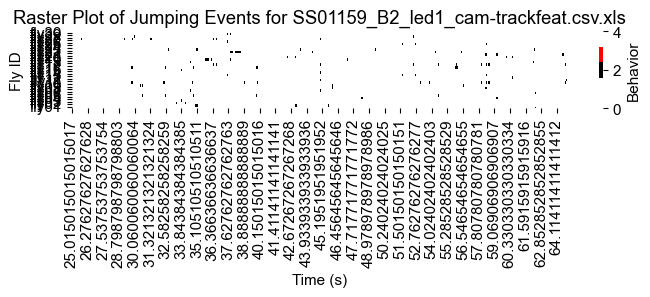

In [13]:
behavior_map = {'walking': 1, 'standing': 0, 'jumping': 2, 'unknown': 3}

fp = 'SS01159_B2_led1_cam-trackfeat.csv.xls'
#plt.figure(figsize=(10, 2 * len(paths)))
# for i, fp in enumerate(paths):
file_df_ctrl = df2[df2['file_path'] == fp]

pivot_df_ctrl = file_df_ctrl[file_df_ctrl.ts.between(25, 65)].pivot_table(
    index='fly',
    columns='ts',
    values='behavior_num',
    aggfunc='max'  # now jump > walk > stand
)

pivot_df_ctrl = pivot_df_ctrl.drop_duplicates().copy().fillna(4)  # Fill NaNs with 4 (no data)

# # Define a color map for each behavior in behavior_map
behavior_color_dict = {
    0: 'white',   # 
    1: 'white',     # standing
    2: 'black',      # walking
    3: 'red',     # jumping
    4: 'white'     # unknown
}
custom_cmap = ListedColormap([behavior_color_dict[k] for k in sorted(behavior_color_dict.keys())])

#custom_cmap = ListedColormap(['white','white','blue' ,'black'])
fig = plt.figure(figsize=(8,1))  


sns.heatmap(pivot_df_ctrl, vmax=4, cmap=custom_cmap,cbar_kws={'label': 'Behavior'})
plt.yticks(np.arange(1, len(pivot_df_ctrl.index) + 1), pivot_df_ctrl.index)
plt.xlabel('Time (s)')
plt.ylabel('Fly ID')
plt.title(f'Raster Plot of Jumping Events for {fp}')
plt.ylim(0.5, len(pivot_df_ctrl.index) + 0.5)
plt.show()


In [14]:
# Group by 'file_path', 'tm_bin_left', and 'behavior' to calculate the fraction of flies exhibiting each behavior
fraction_flies_df = (
    df2.groupby(['file_path', 'genotype', 'ts','behavior_new'])['fly']
    .nunique()
    .reset_index(name='fly_count')
)

# Calculate the total number of unique flies per 'file_path' and 'tm_bin_left'
total_flies_df = (
    df2.groupby(['file_path', 'genotype','ts',])['fly']
    .nunique()
    .reset_index(name='total_flies')
)

# Merge the two dataframes to calculate the fraction of flies
fraction_flies_df = pd.merge(fraction_flies_df, total_flies_df, on=['file_path', 'genotype','ts'])
fraction_flies_df['fraction_flies'] = fraction_flies_df['fly_count'] / fraction_flies_df['total_flies']

# Keep only the required columns
fraction_flies_df = fraction_flies_df[['ts','file_path','genotype', 'behavior_new', 'fraction_flies']]


c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


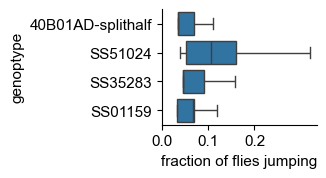

In [15]:
plt.rcParams['font.size'] = 11
fig = plt.figure(figsize=(2,1.5))

ax = sns.boxplot(data=fraction_flies_df[fraction_flies_df.behavior_new=='jumping'], 
                  # jitter=True,
                   y= 'genotype', 
                   x= 'fraction_flies', 
                  showfliers=False,
                   #color='grey', 
                  # alpha=.5, 
                   #size=5,
                   order=['40B01AD-splithalf','SS51024', 'SS35283', 'SS01159'])

#plt.ylim(-1,1)
plt.xticks([0,.1,.2])
#x.collections[0].set_lw(0)
plt.ylabel('genoptype')
plt.xlabel('fraction of flies jumping')
sns.despine()

#plt.xticks(rotation=90)
plt.show()

C:\Users\LAB-JJ\AppData\Local\Temp\ipykernel_10488\172128176.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraction_flies_df[fraction_flies_df.behavior_new=='jumping'][fraction_flies_df.ts<=90],
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a len

<Figure size 500x500 with 0 Axes>

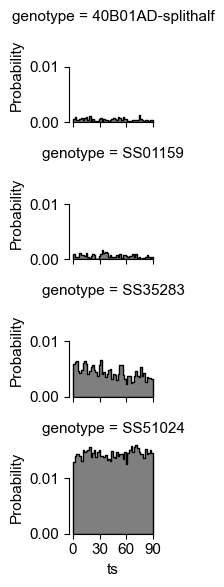

In [16]:
fig = plt.figure(figsize=(5,5))

fig = sns.displot(
    fraction_flies_df[fraction_flies_df.behavior_new=='jumping'][fraction_flies_df.ts<=90], 
                  col='genotype', 
                  col_wrap=1 , 
                  color='black',
                  height=1.5, 
                  aspect=1.2, 
                  x ="ts", 
                  bins=50, 
                  lw=1,
                  #common_norm=False,
                  #kind="kde",
                  stat="probability", 
                  alpha=.5, 
                  element="step"
)

# Customize ticks and appearance
plt.xticks(np.arange(0, 91, 30))
#plt.ylim(0,0.04)
sns.despine(trim=True)

plt.show()

In [18]:
time_windows = {
    'SS35283': {'pre': (0, 10), 'post': (10, 20)},
    '40B01AD-splithalf': {'pre': (0, 10), 'post': (10, 20)},
    'SS01159': {'pre': (20, 30), 'post': (30, 40)},
    'SS51024': {'pre': (20, 30), 'post': (30, 40)},
    'SS46373': {'pre': (0, 10), 'post': (10, 20)}
}
results = []


for genotype, windows in time_windows.items():
    for period, (start, end) in windows.items():
        subset = df[(df['genotype'] == genotype) &
                    (df['tm_bin_left'] >= start) &
                    (df['tm_bin_left'] < end)]
     
        # Group by fly and tm_bin_left to get mean velocity per fly per bin
        mean_vel = subset.groupby(['fly', 'tm_bin_left'])['vel'].mean().reset_index()
        mean_vel['genotype'] = genotype
        mean_vel['period'] = period
        results.append(mean_vel)

vel_compare_df = pd.concat(results, ignore_index=True)


c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


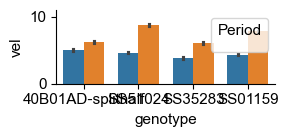

In [19]:
from scipy.stats import ttest_ind
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare data for t-test and plotting
# Only keep genotypes with both pre and post data
genotypes = vel_compare_df['genotype'].unique()
ttest_results = []

plot_df = vel_compare_df[vel_compare_df['period'].isin(['pre', 'post'])].copy()
plot_df = plot_df[plot_df['vel']>0]
# Plot
fig = plt.figure(figsize=(3, 1.5))
sns.barplot(data=plot_df, x='genotype', y='vel', hue='period', width=.75,  legend=False, order=['40B01AD-splithalf','SS51024','SS35283','SS01159'])
plt.ylim(0,11)


sns.despine()
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import ttest_ind

# Filter for post period
agg_df = vel_compare_df.groupby(['fly', 'period', 'genotype'], as_index=False)['vel'].mean()

post_df = agg_df[agg_df['period'] == 'post']

# Get the post velocities for 40B01AD-splithalf
ref_genotype = '40B01AD-splithalf'
ref_post = post_df[post_df['genotype'] == ref_genotype]['vel']

# Compare each genotype's post period to 40B01AD-splithalf
comparison_results = []
for genotype in post_df['genotype'].unique():
    if genotype == ref_genotype:
        continue
    group_post = post_df[post_df['genotype'] == genotype]['vel']
    stat, pval = ttest_ind(ref_post, group_post, nan_policy='omit')
    comparison_results.append({'genotype': genotype, 't_stat': stat, 'p_value': pval})

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

  genotype    t_stat       p_value
0  SS01159 -3.331420  1.520865e-03
1  SS35283  0.088925  9.294425e-01
2  SS51024 -5.490458  6.656545e-07


In [21]:
# Calculate delta (post - pre) for each fly
agg = vel_compare_df.groupby(['fly', 'genotype', 'period'])['vel'].mean().reset_index()

pivot = agg.pivot_table(index=['fly', 'genotype'], columns='period', values='vel').dropna(subset=['pre', 'post'])

pivot['delta'] = pivot['post'] - pivot['pre']

# Compare experimental genotypes' deltas to control delta
from scipy.stats import ttest_ind
control_delta = pivot.xs('40B01AD-splithalf', level='genotype')['delta']

for genotype in pivot.index.get_level_values('genotype').unique():
    if genotype != '40B01AD-splithalf':
        exp_delta = pivot.xs(genotype, level='genotype')['delta']
        stat, pval = ttest_ind(exp_delta, control_delta)
        print(f"{genotype} vs control: t={stat:.8f}, p={pval:.8f}")

SS01159 vs control: t=4.84732498, p=0.00001002
SS35283 vs control: t=1.89796295, p=0.06259657
SS51024 vs control: t=5.65968880, p=0.00000034
